# Mod85 Implementation of ANN in Keras

Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
!pip install tensorflow keras

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras import Sequential

Q2. Load the Wine Quality dataset and explore its dimensions.
Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [2]:
from google.colab import files

uploaded = files.upload()

Saving winequality.csv to winequality.csv


Q3. Check for null values, identify categorical variables, and encode them.

In [17]:
df = pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


## Analysis:

1. Theremis no null values in the dataset.

2. There is no categorical feature in the dataset. But as it is a Binary classification, we can encode the target feature, i.e. **quality**.

In [19]:
# Encoding the target feature, i.e. "quality"

df['quality'] = (df['quality'] >= 6).astype(int)
df['quality'].head(20)

,quality
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


Q4. Separate the features and target variables from the dataset.

In [20]:
X =  df.drop('quality', axis= 1)
y = df['quality']

In [21]:
X.shape, y.shape

((4898, 11), (4898,))

Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [22]:
X_train_full, x_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size= 0.2, random_state = 42)

In [24]:
print("X: ", X.shape)
print("\nX_Train_shape: ", X_train.shape)
print("\nX_Valid_shape: ", X_valid.shape)
print("\nX_Test_shape: ", x_test.shape)

X:  (4898, 11)

X_Train_shape:  (3134, 11)

X_Valid_shape:  (784, 11)

X_Test_shape:  (980, 11)


Q6. Scale the dataset using an appropriate scaling technique.

In [25]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(x_test)

Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

In [26]:
LAYERS = [
    Dense(64, activation= "relu", name = "Input_layer", input_shape= (X_train.shape[1],)),
    Dense(32, activation= "relu", name = "Hidden_layer1"),
    Dense(16, activation="relu", name = "Hidden_layer2"),
    Dense(1, activation = "sigmoid", name = "Output_layer")
]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Q8. Create a Sequential model in Keras and add the previously designed layers to it.

In [28]:
clf_model = Sequential(LAYERS)
clf_model

<Sequential name=sequential_1, built=True>

Q9. Print the summary of the model architecture.

In [29]:
clf_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Dense)             │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer1 (Dense)           │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer2 (Dense)           │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

In [33]:
LOSS = "binary_crossentropy"
OPTIMIZER = "adam"
METRICS = ["accuracy"]

Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [34]:
clf_model.compile(loss = LOSS, optimizer= OPTIMIZER, metrics = METRICS)

Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [41]:
BATCH_SIZE = 32
EPOCHS = 50
VALIDATION_DATA = (X_valid, y_valid)

history = clf_model.fit(X_train, y_train,
              validation_data = VALIDATION_DATA,
              epochs= EPOCHS,
              batch_size = BATCH_SIZE)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8971 - loss: 0.2591 - val_accuracy: 0.7934 - val_loss: 0.4972
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8983 - loss: 0.2587 - val_accuracy: 0.7870 - val_loss: 0.5262
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8970 - loss: 0.2565 - val_accuracy: 0.8010 - val_loss: 0.5043
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8986 - loss: 0.2541 - val_accuracy: 0.7934 - val_loss: 0.5053
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8888 - loss: 0.2583 - val_accuracy: 0.7959 - val_loss: 0.5177
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8933 - loss: 0.2583 - val_accuracy: 0.7997 - val_loss: 0.5016
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8946 - loss: 0.2481 - val_accuracy: 0.8048 - val_loss: 0.5153
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9009 - loss: 0.2402 - val_accuracy: 0.7883 - val_loss:

Q13. Obtain the model's parameters (weights and biases).

In [38]:
# To get whole model's params (weights and biases)

clf_model.weights

[<Variable path=sequential/Input_layer/kernel, shape=(11, 64), dtype=float32, value=[[ 1.90174535e-01 -2.06499830e-01 -5.62831819e-01  7.64535069e-02
    1.76168289e-02  6.08514547e-02 -2.95864165e-01  2.31729046e-01
   -4.99055795e-02  1.86327100e-01  2.74629712e-01 -4.76110429e-02
    3.40121448e-01 -2.04570070e-01  1.50625870e-01  2.51965135e-01
   -2.30919927e-01 -2.28572413e-01 -2.58816063e-01 -5.12419790e-02
    1.63948283e-01 -4.59494330e-02  1.19132489e-01  1.14571676e-01
   -2.22235948e-01  4.11415309e-01 -3.93768735e-02  3.16600323e-01
    2.96886414e-01  1.00812748e-01  1.81156561e-01  1.95687994e-01
   -2.03847736e-01  1.30421057e-01 -6.56088814e-02  2.76363883e-02
    2.36355290e-01  2.82075107e-01  8.35075453e-02 -6.19156808e-02
   -1.97897092e-01  1.85443833e-03 -1.67828843e-01  2.93007810e-02
    1.91866219e-01 -1.44907743e-01  1.06862023e-01 -8.76277406e-03
   -1.13662794e-01 -1.29992008e-01  3.68532687e-02 -2.79781580e-01
    2.43206739e-01  6.72643483e-02 -3.16844970

In [40]:
# To get model's params layer-wise

for i, layer in enumerate(clf_model.layers):
  weights = layer.get_weights()
  print(f"Layer {i}- {layer.name}")

  if len(weights) > 0:
    print("Weights:\n", weights[0])
    print("Biases:\n", weights[1])

  else:
    print("No weights in this layer\n")
  print("\n")

Layer 0- Input_layer
Weights:
 [[ 1.90174535e-01 -2.06499830e-01 -5.62831819e-01  7.64535069e-02
   1.76168289e-02  6.08514547e-02 -2.95864165e-01  2.31729046e-01
  -4.99055795e-02  1.86327100e-01  2.74629712e-01 -4.76110429e-02
   3.40121448e-01 -2.04570070e-01  1.50625870e-01  2.51965135e-01
  -2.30919927e-01 -2.28572413e-01 -2.58816063e-01 -5.12419790e-02
   1.63948283e-01 -4.59494330e-02  1.19132489e-01  1.14571676e-01
  -2.22235948e-01  4.11415309e-01 -3.93768735e-02  3.16600323e-01
   2.96886414e-01  1.00812748e-01  1.81156561e-01  1.95687994e-01
  -2.03847736e-01  1.30421057e-01 -6.56088814e-02  2.76363883e-02
   2.36355290e-01  2.82075107e-01  8.35075453e-02 -6.19156808e-02
  -1.97897092e-01  1.85443833e-03 -1.67828843e-01  2.93007810e-02
   1.91866219e-01 -1.44907743e-01  1.06862023e-01 -8.76277406e-03
  -1.13662794e-01 -1.29992008e-01  3.68532687e-02 -2.79781580e-01
   2.43206739e-01  6.72643483e-02 -3.16844970e-01  3.70952534e-03
  -2.88666934e-01 -3.27774704e-01  3.33070010

Q14. Store the model's training history as a Pandas DataFrame.

In [43]:
history_df = pd.DataFrame(history.history)
history_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.889917,0.265650,0.793367,0.497176
1,0.889279,0.266360,0.786990,0.526249
2,0.895341,0.261345,0.801020,0.504292
3,0.887364,0.264518,0.793367,0.505316
4,0.889917,0.258895,0.795918,0.517665


Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

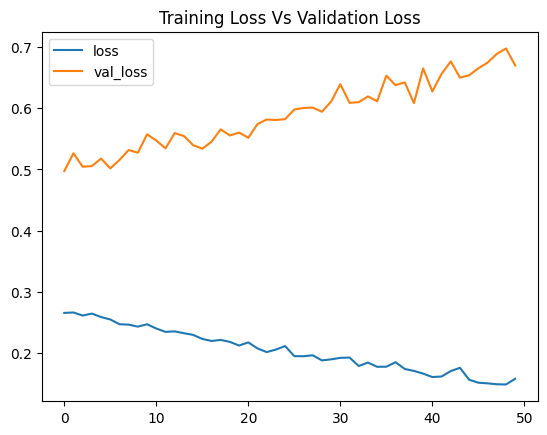

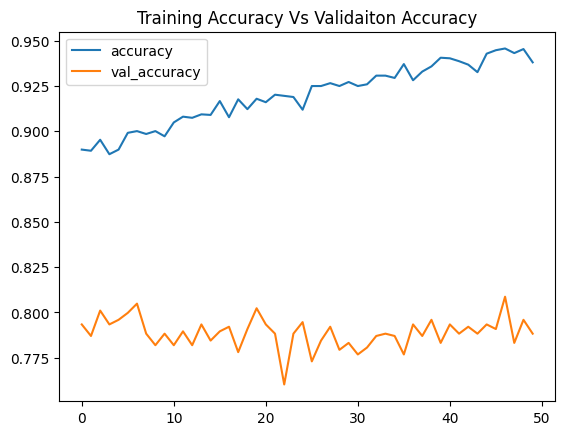

In [44]:
history_df[["loss", "val_loss"]].plot(title="Training Loss Vs Validation Loss")

history_df[["accuracy", "val_accuracy"]].plot(title="Training Accuracy Vs Validaiton Accuracy")

plt.show()

Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [45]:
test_loss, test_accuracy = clf_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy:.4f}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7974 - loss: 0.5750
Test Loss: 0.7027654647827148
Test Accuracy: 0.7888
